# Import Libraries

In [32]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

for dirname,_,filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


# Data Loading

In [33]:
X_train = pd.read_csv('splitted_data/X_train.csv')
X_test = pd.read_csv('splitted_data/X_test.csv')
y_train = pd.read_csv('splitted_data/y_train.csv')
y_test = pd.read_csv('splitted_data/y_test.csv')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16022, 23) (4006, 23) (16022, 1) (4006, 1)


In [34]:
X_train.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,...,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
0,0.054114,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.0,0.00000,0.00000,...,0.0,0.0,0.002355,0.001662,0.00000,0.000000,0.00,0.015625,0.000000,0.0
1,0.001221,0.028689,0.000629,0.004831,0.709677,0.193548,0.580645,0.0,0.25098,0.25098,...,0.0,0.0,0.004495,0.001828,0.00000,0.000000,0.00,0.015625,0.980240,0.0
2,0.012453,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.0,0.00000,0.00000,...,0.0,0.0,0.002569,0.001662,0.00000,0.000000,0.00,0.062501,0.000000,0.0
3,0.001221,0.028689,0.018412,0.014493,0.967742,0.967742,0.838710,0.0,0.25098,0.25098,...,0.0,0.0,0.030610,0.053519,0.00813,0.000000,0.05,0.445563,0.088380,0.0
4,0.001221,0.028689,0.009649,0.014493,0.967742,0.967742,0.838710,0.0,0.25098,0.25098,...,0.0,0.0,0.031519,0.028048,0.00813,0.022727,0.00,0.445563,0.441901,0.0


In [35]:
y_train.head()

,class
0,0
1,2
2,3
3,1
4,2


In [36]:
X_test.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,...,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
0,0.001221,0.028689,0.009477,0.014493,0.967742,0.967742,0.838710,0.000000,0.25098,0.25098,...,0.0,0.0,0.030877,0.027549,0.00813,0.022727,0.0,0.445563,0.441901,0.0
1,0.751694,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.000000,0.00000,0.00000,...,0.0,0.0,0.002569,0.001662,0.00000,0.000000,0.0,0.062501,0.000000,0.0
2,0.205347,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.002355,0.000000,0.00000,0.000000,0.0,0.015625,0.000000,0.0
3,0.990783,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.002569,0.000000,0.00000,0.000000,0.0,0.062501,0.000000,0.0
4,0.069436,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.999997,0.00000,0.00000,...,0.0,0.0,0.002355,0.001662,0.00000,0.000000,0.0,0.015625,0.000000,0.0


In [37]:
y_test.head()

,class
0,2
1,3
2,0
3,3
4,3


# Algorithm: 1 SupportVectorClassifier

In [38]:
from sklearn.svm import SVC
svc_model = SVC(max_iter=980)
svc_model = svc_model.fit(X_train.values, y_train.values.ravel())

In [39]:
svc_prediction = svc_model.predict(X_test.values)
print(svc_prediction.tolist())

[2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 3, 1, 1, 1, 3, 3, 0, 3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 3, 0, 3, 2, 1, 1, 2, 0, 3, 1, 3, 1, 3, 3, 2, 3, 1, 0, 2, 3, 3, 3, 1, 1, 2, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 3, 2, 3, 0, 1, 2, 0, 1, 1, 2, 3, 1, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2, 3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 2, 3, 0, 3, 1, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 2, 3, 1, 2, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 3, 0, 1, 2, 1, 1, 2, 0, 3, 0, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 3, 3, 2, 3, 1, 3, 1, 2, 2, 3, 1, 1, 2, 2, 0, 2, 1, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 2, 1, 3, 1, 3, 0, 1, 1, 1, 1, 2, 3, 3, 0, 2, 1, 1, 2, 2, 3, 3, 1, 0, 3, 1, 1, 3, 2, 3, 3, 2, 3, 1, 2, 3, 2, 0, 3, 3, 0, 2, 3, 2, 0, 1, 3, 1, 2, 0, 2, 0, 3, 1, 3, 3, 0, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 3, 2, 1, 

In [40]:
true_labels = y_test.values.ravel()
print(true_labels.tolist())

[2, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 3, 0, 3, 2, 1, 1, 2, 0, 0, 1, 3, 1, 3, 0, 2, 3, 1, 0, 2, 3, 3, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 3, 3, 0, 0, 0, 2, 2, 0, 2, 1, 3, 1, 2, 2, 1, 1, 0, 2, 3, 0, 1, 3, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 3, 2, 3, 1, 0, 2, 2, 2, 2, 2, 0, 3, 0, 3, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 3, 2, 0, 0, 1, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 0, 0, 3, 0, 1, 2, 1, 1, 2, 0, 3, 0, 2, 2, 1, 1, 3, 1, 0, 3, 3, 0, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 0, 0, 2, 0, 1, 3, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3, 1, 1, 3, 0, 3, 1, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 2, 1, 0, 1, 3, 0, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 1, 1, 3, 2, 3, 3, 2, 3, 1, 2, 3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 3, 1, 3, 0, 0, 3, 0, 3, 2, 2, 0, 2, 1, 0, 3, 2, 3, 0, 2, 1, 

### Result Analysis

In [41]:
class_labels = ['Benign', 'ddos', 'password', 'scanning']

***Accuracy Score***

In [42]:
svc_model_accuracy = accuracy_score(y_true=true_labels, y_pred=svc_prediction)
print("Validation accuracy of SupportVectorClassifier model is {:.2f}%".format(svc_model_accuracy*100))

Validation accuracy of SupportVectorClassifier model is 81.28%


***Classification Report***

In [43]:
print(classification_report(y_true=true_labels, y_pred=svc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.98      0.34      0.50      1002
        ddos       0.95      0.98      0.97      1001
    password       0.98      0.94      0.96      1002
    scanning       0.60      0.99      0.74      1001

    accuracy                           0.81      4006
   macro avg       0.88      0.81      0.79      4006
weighted avg       0.88      0.81      0.79      4006



***Confusion Matrix***

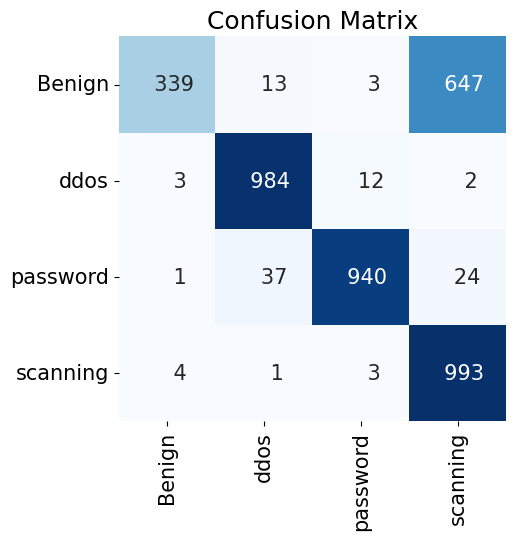

In [44]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_labels, y_pred=svc_prediction),
            annot=True,
            cmap=plt.cm.Blues,
            fmt = "5d",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [45]:
with open(file="models/SupportVectorClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=svc_model, file=file)

# Algorithm: 2 ArtificialNeuralNetwork

In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
y_train, y_test = to_categorical(y_train.values.ravel()), to_categorical(y_test.values.ravel())

In [47]:
ann_model = Sequential()
ann_model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2()))
ann_model.add(BatchNormalization())
ann_model.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()))
ann_model.add(Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()))
ann_model.add(Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2()))
ann_model.add(BatchNormalization())
ann_model.add(Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2()))
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,404 (181.27 KB)

 Trainable params: 45,828 (179.02 KB)

 Non-trainable params: 576 (2.25 KB)

In [49]:
EPOCHS = 50

history = ann_model.fit(
    x=X_train.values,
    y=y_train,
    batch_size=64,
    epochs=EPOCHS,
    validation_data=(X_test.values,y_test),
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)]
)

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8841 - loss: 2.8793 - val_accuracy: 0.7334 - val_loss: 2.2609 - learning_rate: 0.0010
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9665 - loss: 1.0578 - val_accuracy: 0.9471 - val_loss: 1.0496 - learning_rate: 0.0010
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9690 - loss: 0.5862 - val_accuracy: 0.9703 - val_loss: 0.4584 - learning_rate: 0.0010
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9737 - loss: 0.3974 - val_accuracy: 0.9713 - val_loss: 0.3298 - learning_rate: 0.0010
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9738 - loss: 0.3144 - val_accuracy: 0.9728 - val_loss: 0.2785 - learning_rate: 0.0010
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9737 - loss: 0.2722 - val_accuracy: 0.9661 - val_loss: 0.2601 - learning_rate: 0.0010
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9748 - loss: 0.2361 -

$$ Accuracy and Loss plot-graphs $$

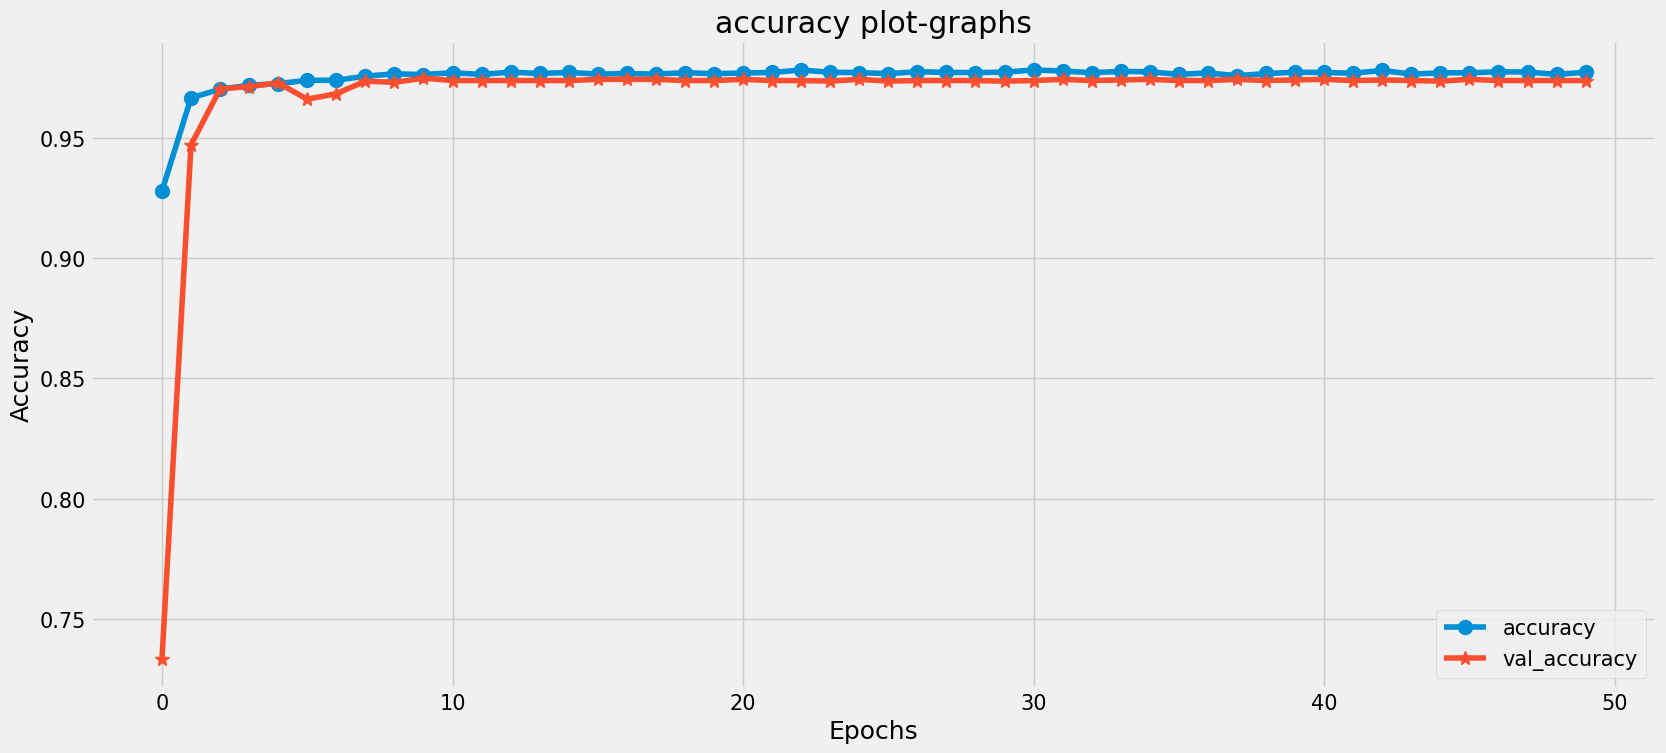

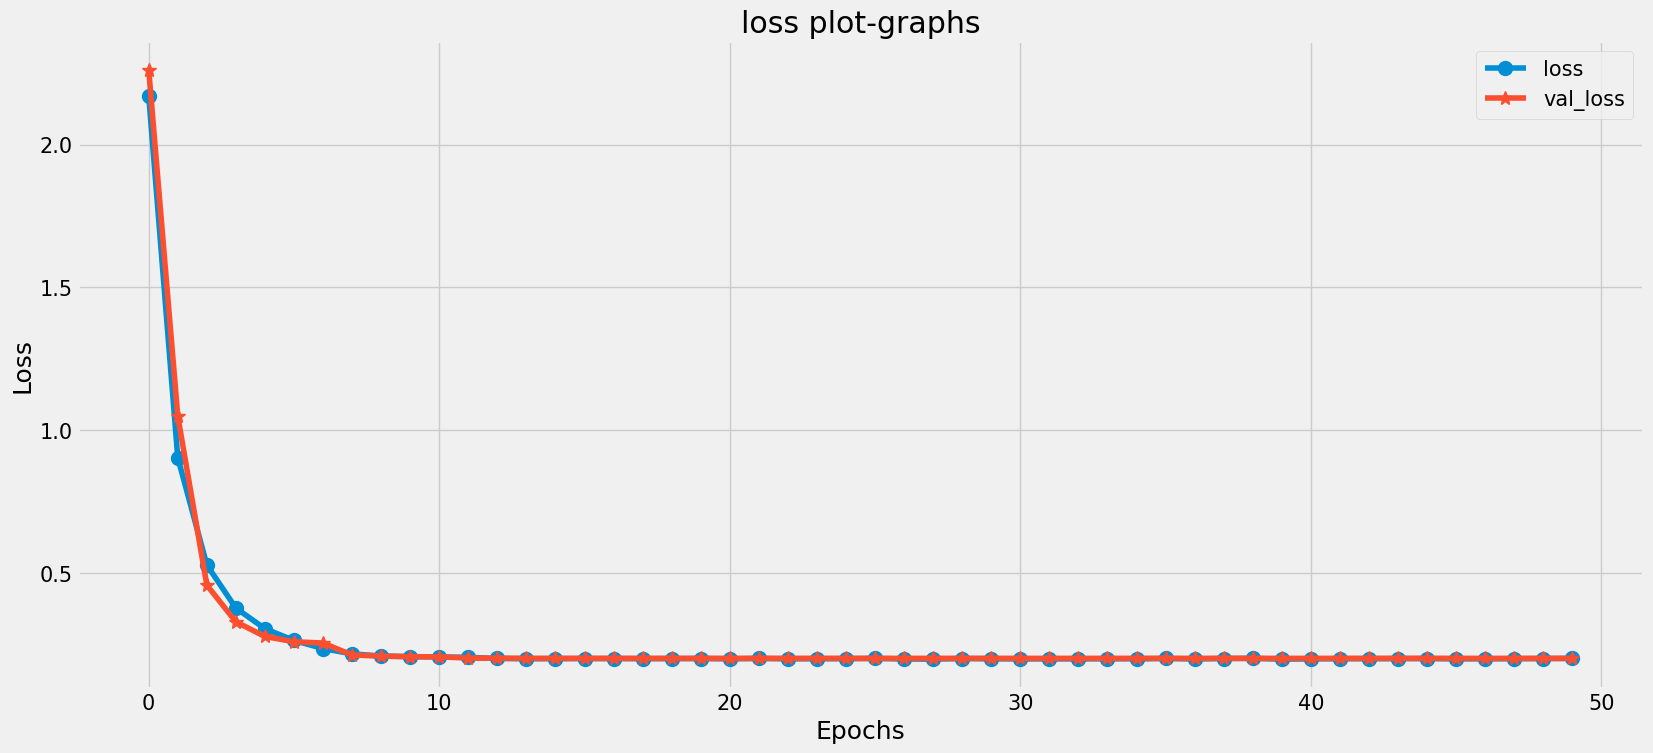

In [50]:
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(history.history["accuracy"],label="accuracy",marker="o",markersize=10)
    plt.plot(history.history["val_accuracy"],label="val_accuracy",marker="*",markersize=10)
    plt.title(label="accuracy plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.plot(history.history["loss"],label="loss",marker="o",markersize=10)
    plt.plot(history.history["val_loss"],label="val_loss",marker="*",markersize=10)
    plt.title(label="loss plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend()
    plt.show()

In [51]:
ann_prediction = ann_model.predict(X_test, batch_size=32, verbose=1)
print(ann_prediction)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[4.4780164e-03 7.4846204e-03 9.8711383e-01 9.2353160e-04]
 [3.6766296e-03 4.1810828e-04 2.0487493e-04 9.9570042e-01]
 [9.9670607e-01 3.6390880e-04 4.4603748e-04 2.4840457e-03]
 ...
 [1.6475753e-03 5.9439836e-04 5.3840404e-04 9.9721968e-01]
 [4.4255396e-03 7.4455380e-03 9.8721397e-01 9.1492903e-04]
 [9.6402818e-01 6.8884087e-03 1.0107651e-02 1.8975766e-02]]


In [52]:
ann_pred = []
for i in range(len(ann_prediction)):
    ann_pred.append(np.argmax(ann_prediction[i]))
print(ann_pred)

[2, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 3, 0, 3, 2, 1, 1, 2, 0, 0, 1, 3, 1, 3, 0, 2, 3, 1, 0, 2, 3, 3, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 3, 3, 0, 0, 0, 2, 1, 0, 2, 1, 3, 1, 2, 2, 1, 1, 0, 2, 3, 0, 1, 3, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 3, 2, 3, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 3, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 0, 0, 3, 0, 1, 2, 1, 1, 2, 0, 3, 0, 2, 2, 1, 1, 3, 1, 0, 3, 3, 0, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 0, 0, 2, 0, 1, 3, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3, 1, 1, 3, 0, 3, 1, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 2, 1, 0, 1, 3, 0, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 1, 1, 3, 2, 3, 3, 2, 3, 1, 2, 3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 3, 1, 3, 0, 0, 3, 0, 3, 2, 2, 0, 2, 1, 0, 3, 2, 3, 0, 2, 1, 

In [53]:
true_labels = []
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))
print(true_labels)

[2, 3, 0, 3, 3, 3, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 1, 2, 3, 0, 3, 2, 1, 1, 2, 0, 0, 1, 3, 1, 3, 0, 2, 3, 1, 0, 2, 3, 3, 3, 1, 1, 2, 0, 3, 1, 1, 0, 1, 3, 3, 3, 0, 0, 0, 2, 2, 0, 2, 1, 3, 1, 2, 2, 1, 1, 0, 2, 3, 0, 1, 3, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 3, 2, 3, 1, 0, 2, 2, 2, 2, 2, 0, 3, 0, 3, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 3, 2, 0, 0, 1, 1, 3, 3, 3, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 0, 0, 3, 0, 1, 2, 1, 1, 2, 0, 3, 0, 2, 2, 1, 1, 3, 1, 0, 3, 3, 0, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2, 3, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 3, 0, 0, 2, 0, 1, 3, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3, 1, 1, 3, 0, 3, 1, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 2, 1, 0, 1, 3, 0, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 1, 1, 3, 2, 3, 3, 2, 3, 1, 2, 3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 3, 1, 3, 0, 0, 3, 0, 3, 2, 2, 0, 2, 1, 0, 3, 2, 3, 0, 2, 1, 

### Result Analysis

In [54]:
class_labels = ['Benign', 'ddos', 'password', 'scanning']

***Accuracy Score***

In [55]:
ann_model_accuracy = accuracy_score(y_true=true_labels, y_pred=ann_pred)
print("Validation accuracy of ArtificialNeuralNetwork model is {:.2f}%".format(ann_model_accuracy*100))

Validation accuracy of ArtificialNeuralNetwork model is 97.38%


***Classification Report***

In [56]:
print(classification_report(y_true=true_labels, y_pred=ann_pred, target_names=class_labels))

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.97      1002
        ddos       0.96      0.98      0.97      1001
    password       0.98      0.97      0.97      1002
    scanning       0.98      0.98      0.98      1001

    accuracy                           0.97      4006
   macro avg       0.97      0.97      0.97      4006
weighted avg       0.97      0.97      0.97      4006



***Confusion Matrix***

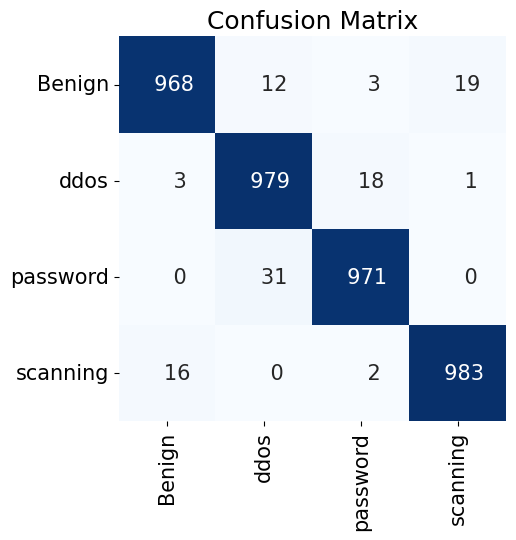

In [61]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_labels, y_pred=ann_pred),
            annot=True,
            cmap=plt.cm.Blues,
            fmt = "5d",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [62]:
ann_model.save("models/ArtificialNeuralNetwork_model.keras")

# Accuracu Comparision of Used Models

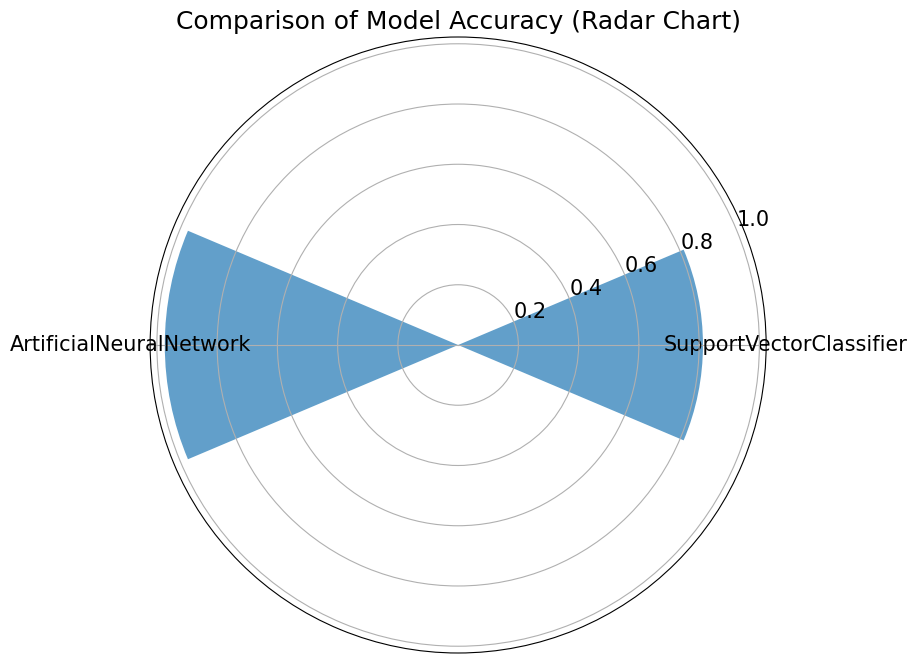

In [59]:
chart_data = [svc_model_accuracy, ann_model_accuracy]
chart_labels = ["SupportVectorClassifier", "ArtificialNeuralNetwork"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

theta = np.linspace(0, 2*np.pi, len(chart_data), endpoint=False)
bars = ax.bar(theta, chart_data, align="center", alpha=0.7)

ax.set_xticks(theta)
ax.set_xticklabels(chart_labels)

plt.title("Comparison of Model Accuracy (Radar Chart)")
plt.show()

---